In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df = pd.read_csv("Admission_Predict_Ver1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [77]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [79]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 

In [80]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,random_state=0)

In [81]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(x_tr)
X_test_scaled = ss.transform(x_te)
y_train = np.array(y_tr)

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state= 0)
rf.fit(x_tr,y_tr)

RandomForestRegressor(n_estimators=500, random_state=0)

In [83]:
x_te.shape

(125, 7)

In [84]:
y_pred = rf.predict((x_te))

In [85]:
y_pred.shape

(125,)

In [86]:
print(y_pred)

[0.65604 0.8466  0.78102 0.88244 0.63372 0.66566 0.53524 0.67458 0.55882
 0.72114 0.61566 0.72396 0.65144 0.78722 0.89518 0.52824 0.81148 0.64558
 0.75414 0.54892 0.50924 0.73048 0.55726 0.92882 0.86196 0.7049  0.63684
 0.52594 0.61904 0.63322 0.71164 0.44762 0.6515  0.83192 0.60168 0.54718
 0.83978 0.90274 0.65764 0.69036 0.68452 0.90696 0.88484 0.69636 0.75202
 0.79842 0.96142 0.80682 0.59614 0.68002 0.66852 0.63854 0.64858 0.7981
 0.70344 0.84414 0.53366 0.88588 0.63824 0.67928 0.412   0.92056 0.64624
 0.9423  0.73334 0.67392 0.73206 0.83902 0.50212 0.73402 0.92142 0.77562
 0.69576 0.64128 0.8042  0.91764 0.75866 0.73524 0.54382 0.6775  0.61666
 0.89664 0.55966 0.69574 0.78098 0.5571  0.80964 0.66278 0.48324 0.62352
 0.7283  0.78726 0.68226 0.70116 0.6494  0.93088 0.5707  0.55492 0.6466
 0.65634 0.9184  0.71282 0.95338 0.61956 0.68746 0.58662 0.68238 0.8531
 0.69754 0.7159  0.46246 0.606   0.61252 0.5583  0.55008 0.87234 0.5289
 0.93352 0.82642 0.9128  0.6726  0.73788 0.91    0.8481

In [87]:
from sklearn import metrics
r_square = metrics.r2_score(y_te, y_pred)
print('R-2 score is:', r_square )

R-2 score is: 0.8001626076585232


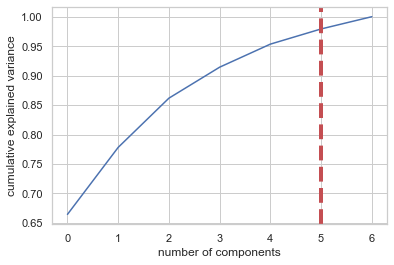

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.664538,0.664538
1,0.778236,0.113698
2,0.861751,0.083515
3,0.914329,0.052579
4,0.953454,0.039125
5,0.979201,0.025747
6,1.000000,0.020799


In [88]:
pca_test = PCA(n_components=7)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [89]:
pca = PCA(n_components=5)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [90]:
y_tr.shape

(375,)

In [91]:
X_train_scaled_pca.shape

(375, 5)

In [92]:
rfc = RandomForestRegressor(n_estimators=500, random_state=0)
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score( X_train_scaled_pca, y_tr))

0.9717861017547441

In [93]:
#y_pred=rfc.predict(X_test_scaled_pca)

In [94]:
X_test_scaled_pca.shape

(125, 5)

In [95]:
y_pred.shape

(125,)

In [96]:
display(rfc.score(X_test_scaled_pca, y_pred))


0.9062127646781922

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=rfc.predict(X_test_scaled_pca)
mse=mean_squared_error(y_te,y_pred)
mae=mean_absolute_error(y_te,y_pred)
rmse=np.sqrt(mse)

print('mse=',mse)
print('mae=',mae)
print('rmse=',rmse)


mse= 0.004822191206399974
mae= 0.04976575999999999
rmse= 0.06944199886523986
